In [1]:
import MPCLinearRegression

m = MPCLinearRegression.MPCLinearRegression("localhost:1235", "localhost:1236")

In [2]:
m.fit(csv_file="../../data/VA_Testdaten_Körpergröße.csv", owned_columns="4")

localhost:1235 waiting for peer localhost:1236
Parameters exchanged
Generating csv file...
csv file generated: /tmp/tmpydmt521x
Starting DP1 on localhost:1235
Starting CSP on localhost:1245
Waiting for result...


In [3]:
import matplotlib.pyplot as plt
import numpy as np

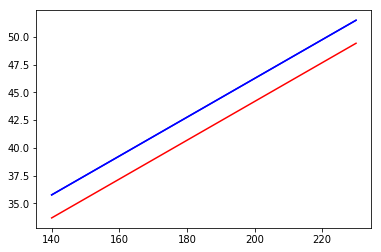

In [9]:
koerper = range(140, 240, 10)
gender = ["m", "w"]

colors = ['b', 'r']

#data = np.genfromtxt ('/tmp/VA_Testdaten_Gesamt.csv', delimiter=";")
#print(data)

#m.csv_file='../../data/VA_Testdaten_Gesamt.csv'
#m.owned_columns=[(True, 2), (False, 3), (False, 4)]
#data = m.parse_csv()

for g in gender:
    schuh = [m.predict({"Geschlecht": g, "Koerpergroesse": k}) for k in koerper]
    plt.plot(koerper, schuh, "b" if g == "m" else "r")
    #data_x = [x[2] if x[0]==g else None for x in data]
    #data_y = [x[1] if x[0]==g else None for x in data]
    #plt.scatter(data_x, data_y, color=colors[g])
plt.show()